In [2]:
import numpy as np
import tensorflow as tf
import keras.applications
from keras.layers import Dense, Input, Conv2D, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout
from keras.applications.resnet50 import preprocess_input as p_i, decode_predictions, ResNet50
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [4]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))


In [5]:
X_224 = np.load("X_224.npy")
y_npy = np.load("data/y_density.npy")
ylog = np.log(y_npy)

In [6]:
np.min(ylog), np.max(ylog)

(2.2082744135228043, 9.300674555657366)

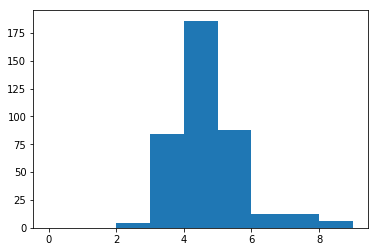

In [7]:
g = plt.hist(ylog, bins = np.linspace(0, 9, 10))
plt.show()

In [8]:
g

(array([  0.,   0.,   4.,  84., 186.,  88.,  12.,  12.,   6.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 9 Patch objects>)

In [9]:
class_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = class_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(10, activation= 'softmax')(x)
class_model = Model(inputs = class_model.input, outputs = predictions)


/home/alexkassil/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [25]:
y_class = keras.utils.np_utils.to_categorical(np.round(ylog), num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X_224, y_class, test_size=.2, random_state=42)

In [26]:
adam = Adam(lr=0.0001)
class_model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
class_model.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
314/314 [==============================] - 30s 97ms/step - loss: 0.4003 - acc: 0.8981
Epoch 2/10
314/314 [==============================] - 3s 10ms/step - loss: 0.1817 - acc: 0.9395
Epoch 3/10
314/314 [==============================] - 3s 10ms/step - loss: 0.1151 - acc: 0.9650
Epoch 4/10
314/314 [==============================] - 3s 9ms/step - loss: 0.0744 - acc: 0.9841
Epoch 5/10
314/314 [==============================] - 3s 10ms/step - loss: 0.0281 - acc: 0.9968
Epoch 6/10
314/314 [==============================] - 3s 9ms/step - loss: 0.0167 - acc: 0.9936
Epoch 7/10
314/314 [==============================] - 3s 9ms/step - loss: 0.0116 - acc: 1.0000
Epoch 8/10
314/314 [==============================] - 3s 9ms/step - loss: 0.0089 - acc: 1.0000
Epoch 9/10
314/314 [==============================] - 3s 10ms/step - loss: 0.0079 - acc: 1.0000
Epoch 10/10
314/314 [==============================] - 3s 10ms/step - loss: 0.0057 - acc: 1.0000


In [27]:
y_pred = class_model.predict(X_test)

In [33]:
np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))

0.8734177215189873

In [34]:
np.argmax(y_pred, axis=1)

array([6, 4, 6, 5, 4, 5, 4, 4, 5, 4, 5, 5, 5, 4, 6, 5, 4, 8, 4, 5, 4, 4,
       4, 4, 4, 4, 5, 4, 3, 6, 4, 4, 8, 5, 4, 4, 5, 6, 9, 3, 8, 4, 4, 4,
       4, 4, 4, 5, 4, 5, 4, 4, 7, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 6, 5,
       5, 4, 5, 5, 5, 4, 6, 5, 5, 4, 4, 4, 4])

In [35]:
np.argmax(y_test, axis=1)

array([6, 4, 6, 5, 4, 4, 4, 6, 5, 4, 5, 5, 5, 4, 6, 5, 4, 8, 6, 4, 3, 4,
       4, 4, 4, 4, 5, 4, 3, 6, 4, 4, 8, 5, 4, 4, 5, 6, 9, 3, 8, 4, 5, 4,
       4, 4, 5, 5, 4, 5, 4, 4, 7, 4, 5, 3, 5, 4, 4, 4, 4, 4, 4, 4, 6, 6,
       5, 4, 5, 5, 5, 4, 6, 5, 5, 4, 4, 4, 4])